# Tensorflow tutorial basics

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data

**Define interactive session**

In [5]:
sess = tf.InteractiveSession()

**Define linespace for future computation**

In [7]:
x = tf.linspace(-3.0, 3.0, 100)
x.get_shape().as_list()

[100]

**Define Gaussian parameters**

In [9]:
mean = 0
sigma = 0.33

** Create one dimesion Gaussian**

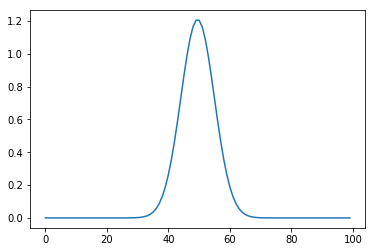

In [14]:
z = (tf.exp(-(tf.pow(x - mean, 2.0) / (2.0 * tf.pow(sigma, 2.0)))) * (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
plt.plot(z.eval())
plt.show()

**Create two dimessional Gaussian**

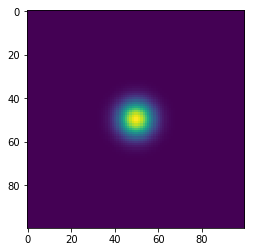

In [15]:
ksize = z.get_shape().as_list()[0]
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))
plt.imshow(z_2d.eval())
plt.show()

** Convolve Gaussian with cameraman image**

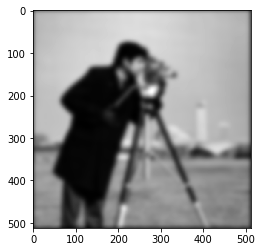

In [18]:
z_4d = tf.reshape(z_2d, [ksize, ksize, 1, 1])
img = data.camera().astype(np.float32)
img_4d = tf.reshape(img, [1, img.shape[0], img.shape[1], 1])
convolved = tf.nn.conv2d(img_4d, z_4d, strides=[1, 1, 1, 1], padding='SAME')
res = convolved.eval()
res = res / np.max(res)
plt.imshow((res * 255.0).reshape([512, 512]), cmap='gray')
plt.show()

**Define Gabor kernel**

Define sine wave

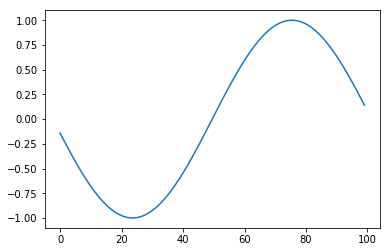

In [19]:
xs = tf.linspace(-3.0, 3.0, ksize)
ys = tf.sin(xs)
plt.plot(ys.eval())
plt.show()

Define 2d sine wave

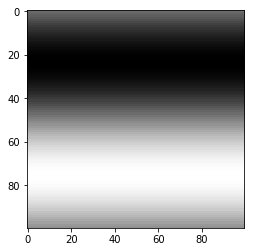

In [22]:
ys = tf.reshape(ys, [ksize, 1])
ones = tf.ones((1, ksize))
wave = tf.matmul(ys, ones)
plt.imshow(wave.eval(), cmap='gray')
plt.show()

Multiply Gaussian with sine

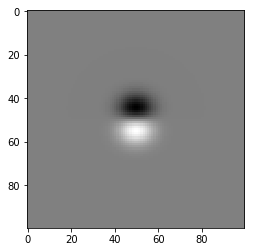

In [24]:
gabor = tf.multiply(wave, z_2d)
plt.imshow(gabor.eval(), cmap='gray')
plt.show()

## Redefine all operations with placeholders

Placeholder for image

In [48]:
img = tf.placeholder(tf.int32, shape=[None, None], name='img')
img_f = tf.cast(img, tf.float32)
img_3d = tf.expand_dims(img_f, 2)
img_4d = tf.expand_dims(img_3d, 0)
img_4d.get_shape().as_list()

[1, None, None, 1]

In [49]:
mean = tf.placeholder(tf.float32, name='mean')
sigma = tf.placeholder(tf.float32, name='sigma')
ksize = tf.placeholder(tf.int32, name='ksize')

Redefine kernel

In [63]:
x = tf.linspace(-3.0, 3.0, ksize)
z = (tf.exp(-(tf.pow(x - mean, 2.0) / (2.0 * tf.pow(sigma, 2.0)))) * (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))
xs = tf.linspace(-3.0, 3.0, ksize)
ys = tf.sin(xs)
ys = tf.reshape(ys, [ksize, 1])
ones = tf.ones((1, ksize))
wave = tf.matmul(ys, ones)
gabor = tf.multiply(wave, z_2d)
gabor_4d = tf.reshape(gabor, [ksize, ksize, 1, 1])

In [71]:
convolved = tf.nn.conv2d(img_4d, gabor_4d, strides=[1, 1, 1, 1], padding='SAME')

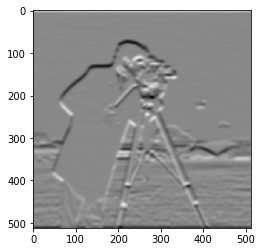

In [75]:
t_img = data.camera()
res = convolved.eval(feed_dict={img: data.camera(), mean: 0.0, sigma:0.2, ksize: 100})
plt.imshow(res.reshape([t_img.shape[0], t_img.shape[1]]), cmap='gray')
plt.show()